In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Basic EDA

In [2]:
# reading the dataset
df=pd.read_csv('AirQuality.csv')
df.sample(5)

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
06/07/2004;02.00.00;0,7;881;-200;4,1;718;43;965;60;1510;837;23,3;48,4;1,3677;;
08/07/2004;20.00.00;4,5;1387;-200;24,6;1419;309;559;192;2113;1677;33,6;26,4;1,3515;;
01/04/2005;21.00.00;0,9;823;-200;1,9;579;144;1070;110;778;420;13,1;31,7;0,4756;;
31/03/2004;16.00.00;2,3;1224;278;10,1;980;152;850;111;1637;1055;15,7;50,9;0,8997;;
26/05/2004;14.00.00;1,6;1027;-200;11,8;1041;128;1237;112;1345;915;32,3;13,3;0,6303;;


# About DATA 

In [3]:
# reading the dataset
df=pd.read_csv('AirQuality.csv',sep=';',decimal=',',header=0)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(9471, 17)

In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [7]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [8]:
df.info() # It give the count of observation present in column with their datatype and give the missing value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [9]:
df.isna().sum() # It gives the nul value count that are present in the column

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

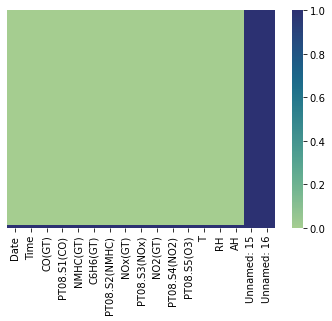

In [10]:
# Visualizing the null values usng heat map of null values 
 
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

In [11]:
# df.tail(115)

In [12]:
'''Dropping the last two columns
assigning inplace argument as True which we result in completely droping off of the last two column
'''
df.drop(columns=['Unnamed: 15','Unnamed: 16','Date'],inplace=True)

In [13]:
df.shape

(9471, 14)

In [14]:
# Dropping the last 114 rows/observation which are fully empty
df.dropna(inplace=True)

In [15]:
df.tail()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [16]:
# df.info()

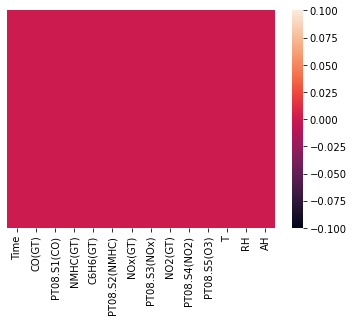

In [17]:
# Now no null values are present in the dataset which was provided
sns.heatmap(df.isna(),yticklabels=False)
plt.show()

In [18]:
df.replace(to_replace=-200,value=np.nan,inplace=True)

In [19]:
df.isna().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

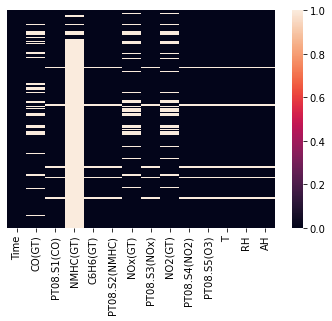

In [20]:
sns.heatmap(df.isna(),yticklabels=False)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         7674 non-null   float64
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [22]:
df.drop(['NMHC(GT)'],inplace=True,axis=1)

In [23]:
df.isna().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

# Outliers

In [24]:
col=list(df.columns[1:])
for i in col:
    df[i]=df[i].fillna(df[i].mean())

In [25]:
df.isna().sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Detecting  the outlier

1. Outlier are extreme values that stand out gretly from the overall pattern of values in the dataset.
2. it is necessary to handel outlier because they affect the model's distribution and ultimately  the accuracy of the model
3. we can use box plot to get an idea of the outlier present in the dataset 
4. The box represent  the interqusrtile range (IQR) , with the median indicated by a line inside  the box 
5. Any point outside the whiskers are consider potential outlier 

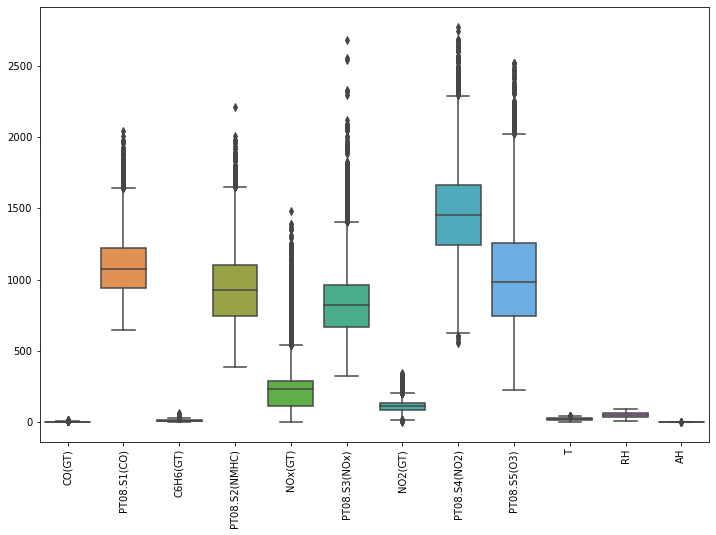

In [26]:
# 1. Plotting a box plot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# getting the quartile one and quartile 3 of each column
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [28]:
# If the values fall behind  Q1 -(1.5*IQR) or above Q3 + (1.5*IQR)
# Then it is been defined as outlier
((df<(Q1-1.5*IQR)) | (df>(Q3 +1.5*IQR))).sum()

AH                 7
C6H6(GT)         286
CO(GT)           454
NO2(GT)          380
NOx(GT)          778
PT08.S1(CO)      145
PT08.S2(NMHC)     91
PT08.S3(NOx)     278
PT08.S4(NO2)     131
PT08.S5(O3)      131
RH                 0
T                 10
Time               0
dtype: int64

# Handling Outlier

In [29]:
mask=(df<(Q1- 1.5 * IQR)) | (df> (Q3 +1.5*IQR))
mask

,AH,C6H6(GT),CO(GT),NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T,Time
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
mask.columns

Index(['AH', 'C6H6(GT)', 'CO(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH',
       'T', 'Time'],
      dtype='object')

In [31]:
# Now replacing all th eoutlier using the median of that particular column
for i in mask.columns[:-1]:
    df[i].astype('float')
    temp=df[i].median()
    df.loc[mask[i],i]=temp

In [32]:
# outlier are now being handled an d are replaced with that column's median value
((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

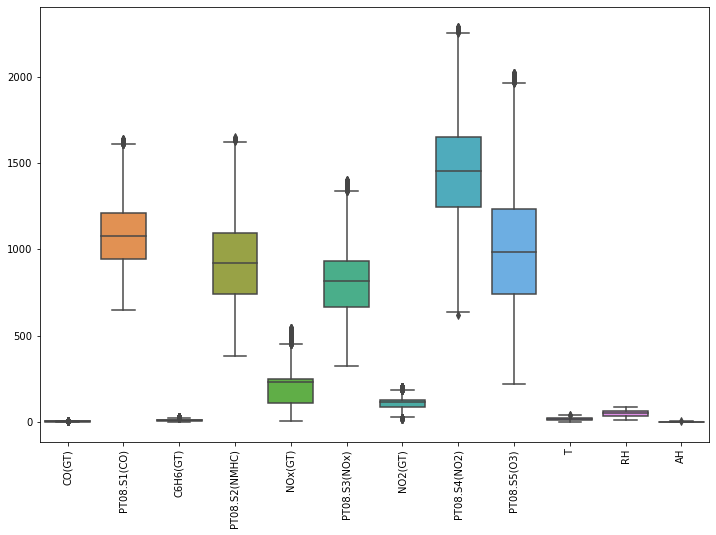

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

### Converting Categorical Features to Numerical

In [34]:
df.head(2)

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255


In [35]:
# Inference : There are no categorical feature/column # If available then 

## Find correlation between attributes



In [36]:
# Using pearson's correlation to find the correlation between all the features
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.685078,0.740949,0.717894,0.560216,-0.593482,0.568398,0.483957,0.668803,0.069788,-0.009705,0.051802
PT08.S1(CO),0.685078,1.000000,0.811695,0.853090,0.466673,-0.755626,0.515980,0.620339,0.851312,0.057536,0.103985,0.133650
C6H6(GT),0.740949,0.811695,1.000000,0.912236,0.450179,-0.712747,0.507309,0.691500,0.788554,0.232110,-0.108150,0.156286
PT08.S2(NMHC),0.717894,0.853090,0.912236,1.000000,0.467958,-0.768591,0.533579,0.727713,0.842632,0.251209,-0.106561,0.182036
NOx(GT),0.560216,0.466673,0.450179,0.467958,1.000000,-0.529675,0.677128,0.082173,0.543215,-0.189059,0.135411,-0.109367
PT08.S3(NOx),-0.593482,-0.755626,-0.712747,-0.768591,-0.529675,1.000000,-0.513462,-0.482471,-0.772358,-0.088810,-0.085665,-0.194880
NO2(GT),0.568398,0.515980,0.507309,0.533579,0.677128,-0.513462,1.000000,0.128650,0.561490,-0.108261,-0.109464,-0.249036
PT08.S4(NO2),0.483957,0.620339,0.691500,0.727713,0.082173,-0.482471,0.128650,1.000000,0.539569,0.581921,-0.047436,0.635000
PT08.S5(O3),0.668803,0.851312,0.788554,0.842632,0.543215,-0.772358,0.561490,0.539569,1.000000,-0.008959,0.120387,0.089491
T,0.069788,0.057536,0.232110,0.251209,-0.189059,-0.088810,-0.108261,0.581921,-0.008959,1.000000,-0.574588,0.658601


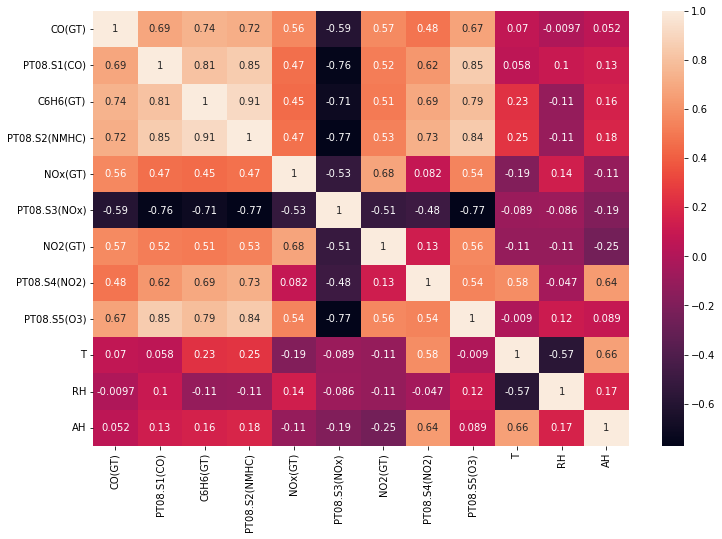

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# ML Problem (Regression)

In [38]:
def solve(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
    # Using linear Model
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("R2 score of Linear regression Model :",r2_score(y_pred,y_test))
    
    # using Lasso
    model=Lasso()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("R2 score of Lasso Model :",r2_score(y_pred,y_test))
    
    # using Ridge
    model=Ridge()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("R2 score of Ridge regression Model :",r2_score(y_pred,y_test))
    

In [39]:
x=df.drop(['C6H6(GT)','Time'],axis=1)
y=df['C6H6(GT)']

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   PT08.S2(NMHC)  9357 non-null   float64
 3   NOx(GT)        9357 non-null   float64
 4   PT08.S3(NOx)   9357 non-null   float64
 5   NO2(GT)        9357 non-null   float64
 6   PT08.S4(NO2)   9357 non-null   float64
 7   PT08.S5(O3)    9357 non-null   float64
 8   T              9357 non-null   float64
 9   RH             9357 non-null   float64
 10  AH             9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


In [41]:
solve(x,y)

R2 score of Linear regression Model : 0.8299163238451625
R2 score of Lasso Model : 0.810807908204286
R2 score of Ridge regression Model : 0.8299125651413487


In [42]:
x=df.drop(['CO(GT)','Time'],axis=1)
y=df['CO(GT)']

In [43]:
def solve(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
    # Using linear Model
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("R2 score of Linear regression Model :",r2_score(y_pred,y_test))
    
    # using Lasso
    model=Lasso()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("R2 score of Lasso Model :",r2_score(y_pred,y_test))
    
    # using Ridge
    model=Ridge()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("R2 score of Ridge regression Model :",r2_score(y_pred,y_test))
    

In [44]:
solve(x,y)

R2 score of Linear regression Model : 0.41955414245366873
R2 score of Lasso Model : 0.31517724057384244
R2 score of Ridge regression Model : 0.41954759015291165


# C6H6 can be finalized as the target variable now because r2score for CO(GT) as target variable is less as compared to the r2sore for the C6H6(GT)